In [56]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [57]:
f = open("out.txt", "r")
a_text = f.read()
f.close()
lines = a_text.split('\n')[:-1]
assert (len(lines)) % 10 == 0
num_lines = len(lines)//10

data = []
for i in range(num_lines):
    start_idx = i*10;
    line_num_iters = lines[start_idx]
    line_time_trials = lines[start_idx+9]
    line_time = line_time_trials.split(':')[0]
    line_trials = line_time_trials.split(':')[1]
    num_iters = int(line_num_iters.split(' ')[0])
    time = float(line_time.split(' ')[0])
    trials = int(line_trials.split(' ')[1])
    data.append((num_iters, time, trials))

In [58]:
times = [d[1] for d in data]
sum(times)/len(data)

0.5808800000000139

In [59]:
size_graph = {}
for d in data:
    size = d[0]
    if size in size_graph:
        size_graph[size][0] += d[1]
        size_graph[size][1] += d[2]
        size_graph[size][2] += 1
    elif size <= 250000:
        size_graph[size] = [d[1],d[2], 1]
size_graph

{10000: [524.8899999999986, 155301, 1000],
 50000: [415.52000000000345, 24813, 1000],
 100000: [447.64000000000345, 13373, 1000],
 150000: [488.7099999999964, 9677, 1000],
 160000: [589.0300000000029, 11029, 1000],
 170000: [545.8400000000008, 9533, 1000],
 180000: [549.5200000000004, 9127, 1000],
 190000: [562.3600000000004, 8878, 1000],
 200000: [607.6500000000001, 9062, 1000],
 210000: [139.22999999999954, 1982, 250],
 220000: [147.91999999999987, 1995, 250],
 230000: [160.82999999999998, 2101, 250],
 240000: [162.67000000000007, 2034, 250],
 250000: [178.2700000000001, 2136, 250],
 20000: [546.889999999999, 81219, 1000],
 30000: [592.7299999999996, 58746, 1000],
 40000: [392.8299999999992, 29075, 1000],
 60000: [465.5800000000017, 23198, 1000],
 70000: [447.56999999999493, 19009, 1000],
 80000: [480.5500000000044, 17789, 1000],
 90000: [447.5799999999948, 14808, 1000],
 110000: [450.440000000005, 12179, 1000],
 120000: [460.4200000000019, 11457, 1000],
 130000: [489.50999999999806,

In [64]:
round(1.222223, 2)

1.22

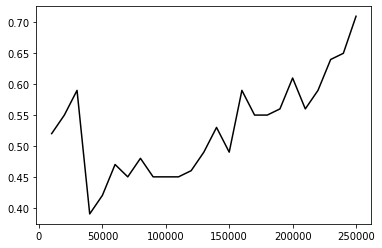

In [65]:
avg_time_per_nn = []
for sg in size_graph:
    avg_time_per_nn.append((sg, round(size_graph[sg][0]/size_graph[sg][2], 2)))
avg_time_per_nn.sort(key= lambda x : x[0])

x = [a[0] for a in avg_time_per_nn]
y = [a[1] for a in avg_time_per_nn]
plt.plot(x,y, color='black')
plt.show()

In [66]:
avg_time_per_nn

[(10000, 0.52),
 (20000, 0.55),
 (30000, 0.59),
 (40000, 0.39),
 (50000, 0.42),
 (60000, 0.47),
 (70000, 0.45),
 (80000, 0.48),
 (90000, 0.45),
 (100000, 0.45),
 (110000, 0.45),
 (120000, 0.46),
 (130000, 0.49),
 (140000, 0.53),
 (150000, 0.49),
 (160000, 0.59),
 (170000, 0.55),
 (180000, 0.55),
 (190000, 0.56),
 (200000, 0.61),
 (210000, 0.56),
 (220000, 0.59),
 (230000, 0.64),
 (240000, 0.65),
 (250000, 0.71)]

In [69]:
25 * 0.0033*5

0.41250000000000003

In [62]:
avg_trial_per_size = []
for sg in size_graph:
    avg_trial_per_size.append((sg, size_graph[sg][1]/size_graph[sg][2]))
avg_trial_per_size.sort(key= lambda x : x[0])
avg_trial_per_size

[(10000, 155.301),
 (20000, 81.219),
 (30000, 58.746),
 (40000, 29.075),
 (50000, 24.813),
 (60000, 23.198),
 (70000, 19.009),
 (80000, 17.789),
 (90000, 14.808),
 (100000, 13.373),
 (110000, 12.179),
 (120000, 11.457),
 (130000, 11.253),
 (140000, 11.309),
 (150000, 9.677),
 (160000, 11.029),
 (170000, 9.533),
 (180000, 9.127),
 (190000, 8.878),
 (200000, 9.062),
 (210000, 7.928),
 (220000, 7.98),
 (230000, 8.404),
 (240000, 8.136),
 (250000, 8.544)]

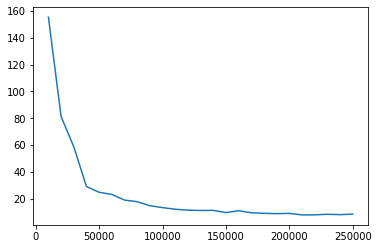

In [63]:
x = [a[0] for a in avg_trial_per_size]
y = [a[1] for a in avg_trial_per_size]
plt.plot(x,y)

In [50]:
avg_time_per_iter_per_size = []
for sg in size_graph:
    avg_time_per_iter_per_size.append((sg, size_graph[sg][0]/size_graph[sg][1]))
avg_time_per_iter_per_size.sort(key= lambda x : x[0])
avg_time_per_iter_per_size

[(10000, 0.0033798236972073497),
 (20000, 0.006734146563732675),
 (30000, 0.01009735216558898),
 (40000, 0.013522822331332954),
 (50000, 0.016747848608906463),
 (60000, 0.020074515648286217),
 (70000, 0.023514933628318326),
 (80000, 0.027040081603264366),
 (90000, 0.030235977872697675),
 (100000, 0.03346247736042231),
 (110000, 0.03701400899342829),
 (120000, 0.04020800879684795),
 (130000, 0.04351655567019964),
 (140000, 0.04701651818856677),
 (150000, 0.05052393760086034),
 (160000, 0.05341844660194208),
 (170000, 0.057295991213619085),
 (180000, 0.060206232813932406),
 (190000, 0.06333840037418134),
 (200000, 0.06709303686366284),
 (210000, 0.0702472250252268),
 (220000, 0.07414536340852124),
 (230000, 0.07654926225606853),
 (240000, 0.07997541789577191),
 (250000, 0.0834597378277154)]

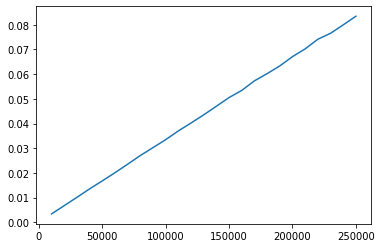

In [51]:
x = [a[0] for a in avg_time_per_iter_per_size]
y = [a[1] for a in avg_time_per_iter_per_size]
plt.plot(x,y)

In [ ]:
# Almost exaclty a straight line, meaning each 10,000 iterations is some scalar multiple of some time unit
# roughly 0.0033 seconds